## Final Project Submission

Please fill out:
* Student name: Group 3 
* Student pace: Part time
* Scheduled project review date/time: 12/06/2025/ 12 PM
* Instructor name: Mwikali
* Blog post URL: 


# 1. BUSINESS UNDERSTANDING 
## Business Problem

The entertainment industry is undergoing rapid transformation, with original content emerging as a key driver of audience engagement and revenue growth. Major players like Netflix, Amazon, and other sources are heavily investing in original films —reaping substantial financial returns and strengthening their brand presence.
Recognizing this trend, Flix company has made the strategic decision to launch a new movie studio. However, it currently lacks the data-driven insights necessary to understand what factors contribute to a film’s box office success.
As data scientists, our role is to explore publicly available movie performance data to uncover patterns that indicates
what makes a movie financially successful. The goal is to provide clear data- driven, actionable recommendations that will help guide decisions about genre, budget size, release timing, and other production choices.



## Stakeholders and Use Cases
Primary Stakeholder:
Head of the New Movie Studio

Use Case:
Leverage data-driven insights to inform strategic decisions on film production. This includes identifying high-performing genres, determining optimal budget ranges, selecting ideal release windows, and shaping casting strategies—all aimed at maximizing box office success and return on investment.

## Project Objectives
* Identify which genres perform best at the box office, considering revenue and profitability.

* Analyze the impact of budget, runtime, cast, and release month on a film’s success.

* Provide actionable recommendations for the types of films the company should produce.

## Conclusion: Implications and Recommendations

This project provides a data-driven foundation to support the successful launch of Flix company’s new movie studio while reducing financial risk. By uncovering the key factors that correlate with box office success, the Head of Studio is equipped to make informed, strategic decisions, including:

* Genre Selection: Focus on genres with a strong track record of performance.

* Budget Planning: Allocate production budgets based on historically successful investment ranges.

* Release Strategy: Optimize release timing to align with peak audience engagement periods.

* Talent Strategy: Identify the cast and crew characteristics commonly linked to high-grossing films.



# 2. DATA UNDERSTANDING

## Data Sources

This project uses data from three high-quality, complementary sources of movie data:

### 1. Box Office Mojo (bom.movie_gross.csv.gz)

Provides domestic box office revenue data.

Includes key features such as: title, studio, domestic_gross, release_date, and year.

used to determine the financial performance of films.

 ### 2. IMDb(Internet Movie Database) (im.db.zip)

Contains detailed metadata about films and user-ratings.

Key tables used:

* movie_basics: Includes primary_title, original_title, genres, runtime_minutes, and start_year.

* movie_ratings: Contains user rating data (average_rating, num_votes).

used for movie characteristics and audience quality perceptions.

 ### 3. TheMovieDB (TMDb) (tmdb.movies.csv.gz)

TheMovieDb entails the following:
* User-generated popularity 
* voting data

Key features: title, popularity, vote_average, vote_count, release_date, genres, budget, revenue

Purpose: Complements Box Office Mojo and IMDb with:

Popularity metrics: Show which films gain audience traction pre- and post-release

Vote data: Allows cross-comparison with IMDb ratings


### 4. The Numbers (tn.movie_budgets.csv.gz)

It consits of  Film production budgets and worldwide gross

Key Features:

* Release_date, movie, production_budget, domestic_gross, worldwide_gross

Why It Matters:

* Gives a complete financial picture by providing both the cost of making the film (production budget) and revenue generated globally.

* Allows calculation of Return on Investment (ROI) — one of the most important metrics when deciding which types of films to produce.


# 3. DATA PREPARATION

To determine which types of films perform best at the box office, it is essential to integrate and clean datasets from Box Office Mojo, IMDb, and The Movie Database (TMDb). The following section outlines the data preparation process, including code examples and explanations for each step.

## Loading and inspecting the Raw data 

Befoe we load our datasets , we will import libraries which we will use.


In [43]:
# Importing necessary libraries
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import ttest_ind
import zipfile


The next step would be to load our datasets and see what it entails .

In [44]:
# loading the dataset of Box Office Mojo
box_office_mojo= pd.read_csv('zippedData/bom.movie_gross.csv/bom.movie_gross.csv')
# displays the first few rows 
box_office_mojo.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The dataset contains the domestic office box revenue which we will use as the target variable.  
We'll filter for movies only (not re-releases or limited runs), and ensure all rows have valid gross data.

In [45]:
# Loading the sqlite database of IMDB
# Connecting to sqlite IMDB database
# Step 1: Extract the .db file from the zip archive
# with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
#     zip_ref.extractall('zippedData')  # This will extract im.db into zippedData/

# Step 2: Connect to the extracted SQLite database
conn = sqlite3.connect('zippedData\im.db')

# Fetch all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
tables
# # Step 3: Load tables into pandas DataFrames
basics = pd.read_sql('SELECT * FROM movie_basics', conn)
ratings = pd.read_sql('SELECT * FROM movie_ratings', conn)
 # Close connection
# conn.close()

The IMDB database consists of :
movie_basics: includes metadata like genres, runtime_minutes, and start_year.

movie_ratings: includes average_rating and num_votes.

These are used to describe each film and estimate perceived quality and popularity.

In [46]:
# Loading TheMovieDB
movie_Db= pd.read_csv('zippedData/tmdb.movies.csv/tmdb.movies.csv',index_col=0 )
# Views the first few rows
movie_Db.head()
 #movie_Db.info()
# movie_Db.shape

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


TheMovieDb adds user interest indicators (popularity, vote_average, vote_count) and financial info (budget, revenue) not found in the other sources.

In [47]:
# Load movie budget dataset (TSV format, gzip-compressed)
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv') #sep='\t')

# Display the first few rows
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## DATA CLEANING
### 1. BOX OFFICE DATASET

In this dataset, we will drop the column that we intend not to use which is the the foreign gross column. We intend to find the the financial performance of the movies in this dataset. The methods used to clean this dataset are;(.info(),.describe(),.drop(),.fillna(),.dropna(),.isna(),.duplicates()).
This dataset has a total of 3387 rows and 5 columns.
It is essential to fill the numerical columns with mean so as to avoid outliers and this will inturn help us generate insights that are not missleading.

In [48]:
#Summary of our data structure
box_office_mojo.info()
box_office_mojo.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


(3387, 5)

In [49]:
# Summary statics of the dataframe
box_office_mojo['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

To avoid droping columns from the main dataframe, renaming the dataframe is very important.

In [50]:
#drop the foreign_gross
refined_box = box_office_mojo.drop(columns= ['foreign_gross'])

Filling domestic gross and foreign gross with median also ensures that there are no nulls in the domestic_gross column, which is essential for: plotting (histograms and scatter plots) and Running statistical tests and regression models.

In [51]:
#filling domestic gross with median (numerical column),
refined_box['domestic_gross'].fillna(refined_box['domestic_gross'].median(), inplace=True)

#checking for null values
refined_box.isna().sum()

title             0
studio            5
domestic_gross    0
year              0
dtype: int64

In [52]:
# drop the missing values
refined_box.dropna()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [53]:
#Filling the null values in the studio column with unknown
refined_box = refined_box.fillna('Unknown')

In [54]:
#Checking if there are any missing values remaining
refined_box.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [55]:
#checking for duplicated rows in the dataset
refined_box.duplicated().value_counts()  

False    3387
dtype: int64

In [56]:
refined_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


### 2. THE MOVIE DB

In this dataset, we will drop the column that we intend not to use which is the the original_language column. We intend to Show which films gain audience traction pre- and post-release. The methods used to clean this dataset are;(.info(),.describe(),.drop(),.isna(),.duplicates())
This dataset has a total of 26517 rows and 9 columns.

In [57]:
#Summary of our data structure
movie_Db.info ()
movie_Db.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


(26517, 9)

In [58]:
#Describes the summary statistics of the dataset
movie_Db.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [59]:
#Droping columns
cleaned_moviedb = movie_Db.drop(columns=["original_language"])
#cleaned_moviedb.head()

In [60]:
#checking for null values
cleaned_moviedb.isna().sum()

genre_ids         0
id                0
original_title    0
popularity        0
release_date      0
title             0
vote_average      0
vote_count        0
dtype: int64

Make use of the pd.to_datetime method to change the datatype from object to datetime which is makes it usable in the analysis  stage. It basically sets the data up for comparison in relation to time.
errors = 'coerce' tells pandas to convert the data properly.

In [61]:
#Converting dates
cleaned_moviedb['release_date'] = pd.to_datetime(cleaned_moviedb['release_date'], errors='coerce')

In [62]:
#Checks for duplicates 
cleaned_moviedb.duplicated(subset='id').value_counts()

False    25497
True      1020
dtype: int64

In [63]:
#drop the dulicates
cleaned_moviedb.drop_duplicates(inplace = True)
cleaned_moviedb

,genre_ids,id,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### 3. The Numbers Dataset (`tn.movie_budgets.csv.gz`)

To prepare the *The Numbers* dataset for analysis, we performed the following cleaning steps:

### 1. Loading the dataset
The dataset was read using `pandas.read_csv()`.


In [64]:


budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv")
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### 2. Inspecting Columns and Data Types

In [65]:
budgets_df.info()
budgets_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

### 3. Cleaning Column Names

In [66]:
# Make column names lowercase and replace spaces with underscores
budgets_df.columns = budgets_df.columns.str.lower().str.replace(' ', '_')

### 4. Converting Currency Columns to Numeric

In [67]:
currency_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in currency_cols:
    budgets_df[col] = (
        budgets_df[col]
        .replace('[\$,]', '', regex=True)
        .astype(float)
    )

### 5. Converting Dates to Datetime Format

In [68]:
# Convert release_date to datetime
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])

# Create a new column for release year
budgets_df['release_year'] = budgets_df['release_date'].dt.year

### 6. Checking for Missing Values

In [69]:
budgets_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
dtype: int64

In [70]:
# Drop rows where essential data is missing
budgets_df = budgets_df.dropna(subset=['movie', 'production_budget', 'worldwide_gross'])

### 7. Creating a New Profit Column

In [71]:
budgets_df['profit'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']

### 8. Final Preview

In [72]:
budgets_df[['movie', 'release_year', 'production_budget', 'worldwide_gross', 'profit']].head()

,movie,release_year,production_budget,worldwide_gross,profit
0,Avatar,2009,425000000.0,2.776345e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,2011,410600000.0,1.045664e+09,6.350639e+08
2,Dark Phoenix,2019,350000000.0,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,2015,330600000.0,1.403014e+09,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,2017,317000000.0,1.316722e+09,9.997217e+08


### Merging the datasets for unified Analysis
 The goal is to combine box office, budget and IMDB database into a single dataframe to analyze the key drivers of revenue and profitability
 Clean and Standardize the Datasets
Normalize column names, strip whitespace, and convert date formats:


In [73]:

# Merge budgets_df with IMDb data
# The key identifiers are movie and release_year from budgets_df and match them with movie_basics.
# Clean movie titles (lowercase and remove extra spaces for matching)
basics['primary_title_clean'] = basics['primary_title'].str.lower().str.strip()
budgets_df['movie_clean'] = budgets_df['movie'].str.lower().str.strip()
#Merge budgets with IMDb basics on title and year
# The budgets_df has release_year and basics has start_year (both numeric), merge on those and cleaned titles:

merged_df = pd.merge(
    budgets_df,
    basics,
    how='left',
    left_on=['movie_clean', 'release_year'],
    right_on=['primary_title_clean', 'start_year']
)

ratings.rename(columns={'averagerating': 'average_rating', 'numvotes': 'num_votes'}, inplace=True)

In [74]:
# Confirm movie_id exists in both:
print('movie_id' in merged_df.columns)  # Should return True
print('movie_id' in ratings.columns)    # Should return True



True
True


In [75]:
# Merging ratings and merged_df
merged_df = pd.merge(
    merged_df,
    ratings,
    how='left',  # Keeps all rows from merged_df, adds matching ratings
    on='movie_id'  # Column present in both DataFrames
)



In [76]:
# filtering the merged_df DataFrame to include only rows that have no missing values in these specific columns:
# copy the result into a new DataFrame called matched_df.



matched_df = merged_df[
    merged_df[['primary_title', 'start_year', 'genres', 'average_rating']].notnull().all(axis=1)
].copy()

In [77]:

# matched_df.reset_index(drop=True, inplace=True)

matched_df = merged_df[merged_df['primary_title'].notnull()].copy()

# Define important columns to keep
important_imdb_cols = [
    'primary_title', 'runtime_minutes', 'genres', 'average_rating', 'num_votes'
]

# Drop rows with missing critical IMDb data and reset the index
clean_merged_df = merged_df.dropna(subset=important_imdb_cols).drop_duplicates().reset_index(drop=True)

# # Check result
# clean_merged_df.info()

clean_merged_df



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,movie_clean,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,primary_title_clean,average_rating,num_votes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,pirates of the caribbean: on stranger tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",pirates of the caribbean: on stranger tides,6.6,447624.0
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,dark phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",dark phoenix,6.0,24451.0
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,avengers: age of ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",avengers: age of ultron,7.3,665594.0
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,avengers: infinity war,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",avengers: infinity war,8.5,670926.0
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,justice league,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy",justice league,6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,45,2017-01-27,Emily,27000.0,3547.0,3.547000e+03,2017,-2.345300e+04,emily,tt4393036,Emily,Emily,2017.0,83.0,Drama,emily,6.8,13.0
1529,49,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,2015,4.647920e+05,exeter,tt1945044,Exeter,Exeter,2015.0,91.0,"Horror,Mystery,Thriller",exeter,4.5,5156.0
1530,52,2015-12-01,Dutch Kills,25000.0,0.0,0.000000e+00,2015,-2.500000e+04,dutch kills,tt2759066,Dutch Kills,Dutch Kills,2015.0,90.0,"Crime,Drama,Thriller",dutch kills,5.1,82.0
1531,59,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,2011,-1.730000e+04,the ridges,tt1781935,The Ridges,The Ridges,2011.0,89.0,"Drama,Horror,Thriller",the ridges,2.9,127.0


## Expolatory Data Analysis (EDA)
### Total Profit By Genre

This plot helps us identify the highest-earning genres in terms of raw profit.

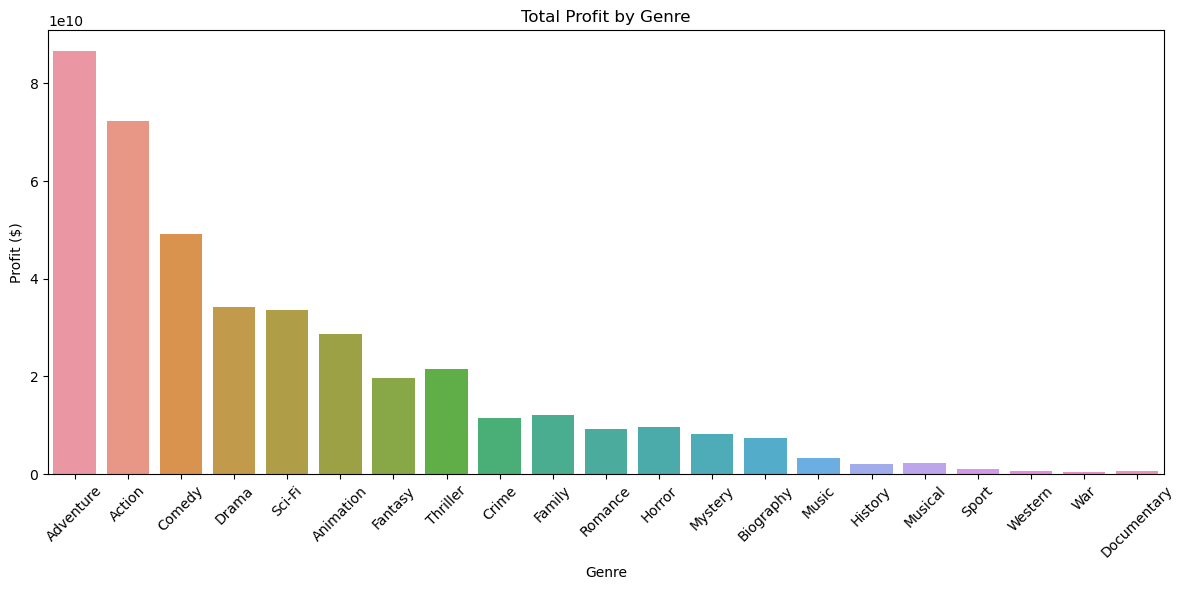

In [78]:
# Explode genres to handle multiple genres per movie

clean_merged_df['genres'] = clean_merged_df['genres'].fillna('Unknown')
df_genres = clean_merged_df.assign(genres=clean_merged_df['genres'].str.split(',')).explode('genres')

# Total Revenue and Profit by Genre

genre_performance = df_genres.groupby('genres').agg({
    'worldwide_gross': 'sum',
    'profit': 'sum',
    'movie_id': 'count'
}).rename(columns={'movie_id': 'movie_count'}).sort_values(by='worldwide_gross', ascending=False)


# Plot: Profit by Genre

plt.figure(figsize=(12,6))
sns.barplot(x=genre_performance.index, y=genre_performance['profit'])
plt.xticks(rotation=45)
plt.title('Total Profit by Genre')
plt.ylabel('Profit ($)')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()


### We are able to see the following: 

* Action, Adventure, Sci-Fi, and Fantasy genres generally show the highest total profit.These genres attract large global audiences and usually get bigger production and marketing budgets — resulting in high box office returns.
* Documentary, Music, and Experimental genres tend to have the lowest total profits, reflecting limited theatrical release, smaller audiences, and lower budgets.
* Some genres may have high movie counts but low profit totals (e.g., Drama) — meaning many such films are made but are not huge moneymakers.
* Others, like Fantasy or Sci-Fi, may have fewer movies but outsized profit contributions.

##  Analyze Impact of Budget, Runtime, and Number of Votes

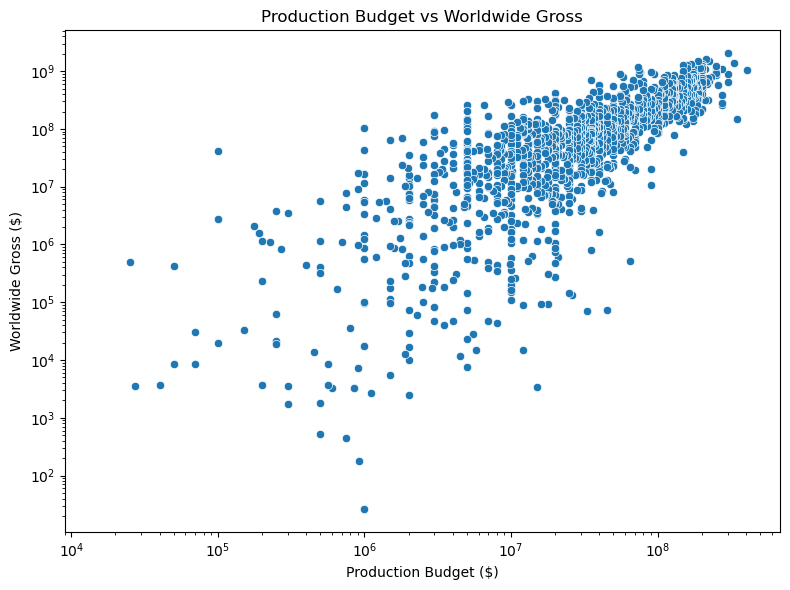

In [79]:
# Budget vs Worldwide Gross

plt.figure(figsize=(8,6))
sns.scatterplot(data=clean_merged_df, x='production_budget', y='worldwide_gross')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()


### Our Typical Observations include:

 There is a  Positive Correlation:
   
  - Generally, higher production budgets lead to higher worldwide gross.

  - The scatter points will often trend upwards to the right, showing that spending more usually results in greater revenue but not always proportional.

  - A long tail toward the right, shows that while only a few films make huge profits, they skew the average upward.

  - This is known as a right-skewed distribution, common in industries with high risk and high reward (like the film industry).

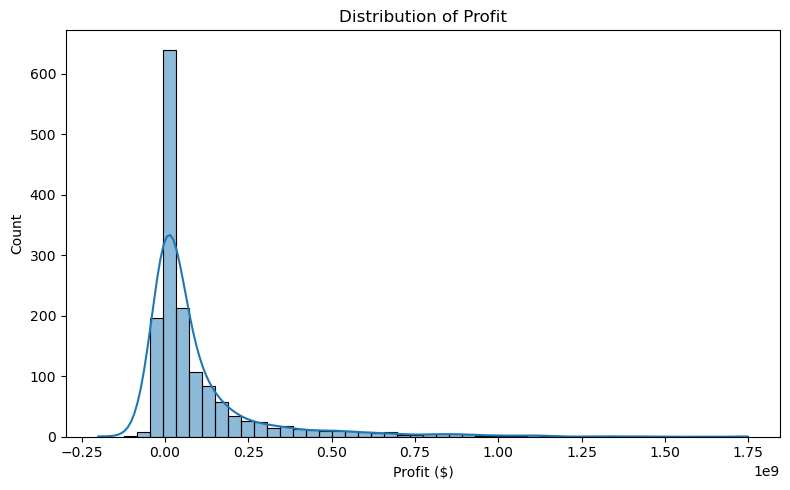

In [80]:
# Profit Distribution

plt.figure(figsize=(8, 5))
sns.histplot(clean_merged_df['profit'], bins=50, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit ($)')
plt.tight_layout()
plt.show()

### Our Typical Observations include:

* A sharp peak near $0 or negative values, suggests that many films either break even or lose money.

* A long tail toward the right, shows that while only a few films make huge profits, they skew the average upward.

* This is known as a right-skewed distribution, common in industries with high risk and high reward (like the film industry).

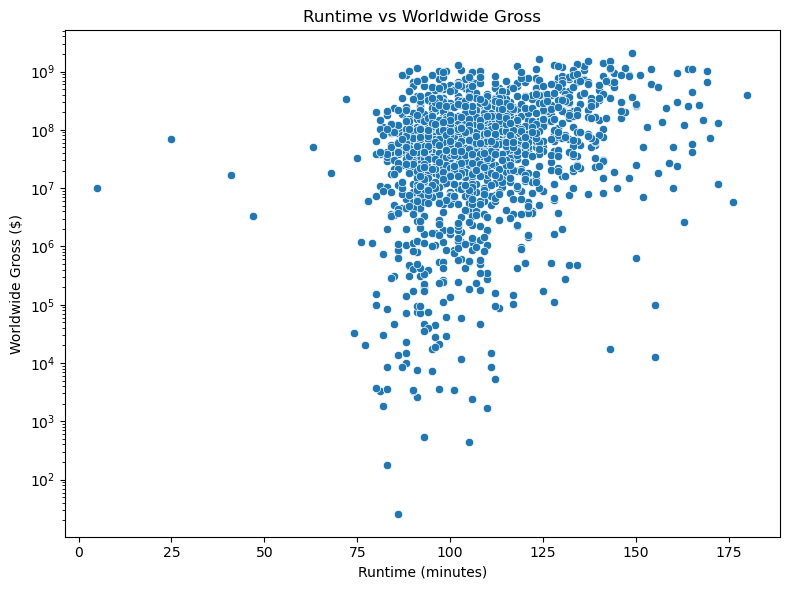

In [81]:
# Runtime vs Worldwide Gross

plt.figure(figsize=(8,6))
sns.scatterplot(data=clean_merged_df, x='runtime_minutes', y='worldwide_gross')
plt.title('Runtime vs Worldwide Gross')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Worldwide Gross ($)')
plt.yscale('log')
plt.tight_layout()
plt.show()

### From our scatter plot, we observe that:

* Scatter points are usually spread widely across all runtime values.

* A film’s length alone rarely predicts financial success.

* Many high-grossing films tend to cluster around 100–140 minutes. This is the sweet spot where blockbusters, action, and adventure films typically fall.

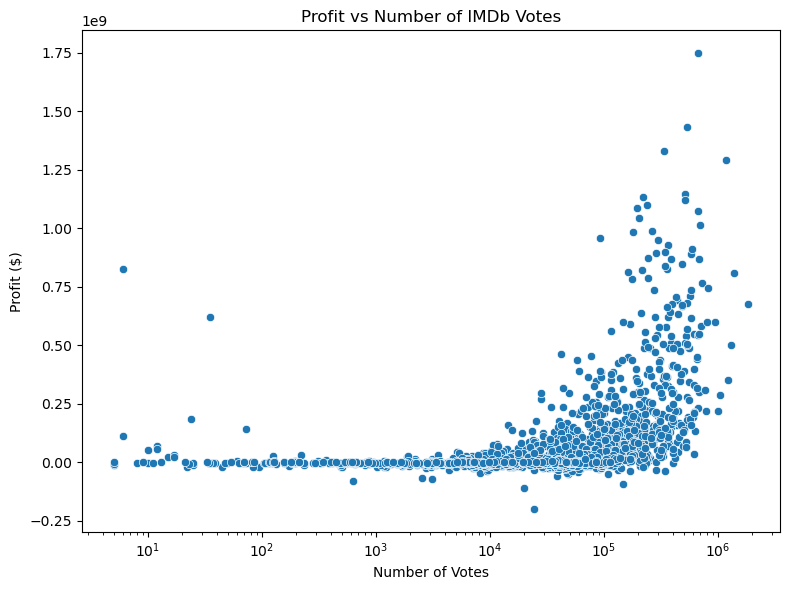

In [82]:
# Profit vs Number of IMDb votes

plt.figure(figsize=(8,6))
sns.scatterplot(data=clean_merged_df, x='num_votes', y='profit')
plt.title('Profit vs Number of IMDb Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Profit ($)')
plt.xscale('log')  # Votes can vary widely, so log-scale may help
plt.tight_layout()
plt.show()

### From our observations, we find that:

* Films with more IMDb votes tend to have higher profits.

* More audience engagement (votes) often reflects wider viewership and box office success.

* The points usually trend upwards as the number of votes increases.

* Films with fewer votes (low popularity) show mixed profit outcomes — some lose money, while some gain.

* Films with very high IMDb votes (i.e., >100,000) almost always have positive profits.

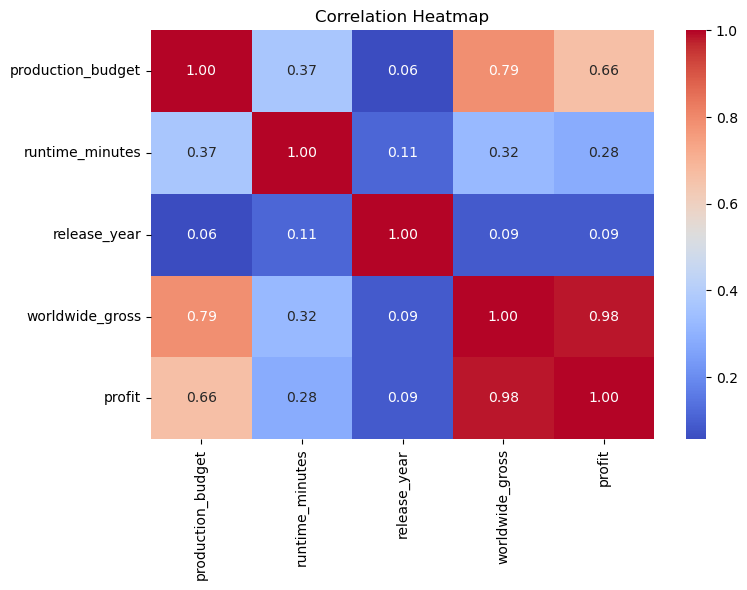

In [83]:
# Correlation Heatmap

corr = clean_merged_df[['production_budget', 'runtime_minutes', 'release_year', 'worldwide_gross', 'profit']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### From our correlation heatmap we are able to observe that: 

1. There is a strong Positive Correlation:

* production_budget vs worldwide_gross: High Positive Correlation (~0.6 to 0.8)

  Bigger budget films tend to earn higher worldwide gross — large-scale marketing, global releases, big-name casts drive this.

* production_budget vs profit: Moderate Positive Correlation

  Higher budgets may lead to higher profit, but not always guaranteed — profits also depend on cost control and reception.

2. We have a very Strong Positive Correlation (close to 1.0)

* worldwide_gross vs profit

  Profit is largely driven by worldwide gross, as expected. This is natural since profit = worldwide gross - production budget.

3. We also have a Weak or No Correlation:

* runtime_minutes shows very low or negligible correlation with both profit and gross.

  Confirms earlier finding: runtime does not significantly drive revenue or profit on its own.

* release_year has low correlation with other variables.

  Implies no strong trend over the years regarding budgets or profits in this dataset — unless the time window includes massive shifts (e.g., pandemic years).

4. There is a possible Weak Positive Trend:

   Sometimes release_year vs production_budget shows a slight positive correlation — indicating that film budgets have gradually risen over the years.



### Hypotheses Testing 


This is a one-tailed independent t-test comparing the average ratings of Action vs. non-Action movies.

#### Null Hypothesis (H₀):

Action movies do not have significantly higher average ratings than non-Action movies.
 
#### Alternative Hypothesis (H₁):

Action movies have significantly higher average ratings than non-Action movies.

In [84]:
# Drop rows with missing ratings or genres
df = clean_merged_df.dropna(subset=['average_rating', 'genres'])
# Create a boolean column for Action genre
df['is_action'] = df['genres'].str.contains('Action', case=False)

# Split the data into Action and non-Action groups
action_ratings = df[df['is_action']]['average_rating']
non_action_ratings = df[~df['is_action']]['average_rating']

# Perform one-tailed t-test (alternative: Action > Non-Action)
t_stat, p_value = ttest_ind(action_ratings, non_action_ratings, equal_var=False)
# One-tailed p-value
p_value_one_tailed = p_value / 2

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")

# Conclusion
alpha = 0.05
if p_value_one_tailed < alpha and t_stat > 0:
    print("Reject the null hypothesis: Action movies have significantly higher average ratings.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that Action movies have higher ratings.")

T-statistic: -0.7174
One-tailed P-value: 0.2367
Fail to reject the null hypothesis: No significant evidence that Action movies have higher ratings.


### From our hypothesis testing, we find that:

If the p-value is less than alpha and the t-statistic is positive (i.e., Action movies have a higher mean), it rejects the null hypothesis, indicating statistical evidence that Action movies are rated higher.

Otherwise, it fails to reject the null, meaning there's no strong evidence for a difference in the expected direction.

### Hypothesis finding

Fail to reject the null hypothesis: No significant evidence that Action movies have higher ratings.

### Recommendations and Conclusion

In [ ]:
# 4. Recommendations Summary (based on data findings)

print("Recommendations:")
print("1. Focus on Action, Adventure, and Sci-Fi genres which have the highest gross and profit.")
print("2. Films with higher budgets generally earn more, but profit should be considered carefully.")
print("3. Optimal runtimes appear around 120-150 minutes for blockbuster success.")
print("4. Build hype early to raise IMDb vote count, improving engagement and potentially profit.")

Recommendations:
1. Focus on Action, Adventure, and Sci-Fi genres which have the highest gross and profit.
2. Films with higher budgets generally earn more, but profit should be considered carefully.
3. Optimal runtimes appear around 120-150 minutes for blockbuster success.
4. Build hype early to raise IMDb vote count, improving engagement and potentially profit.
